In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/clothoutZ (2).csv')
df

,age,height,weight,size,bmi
0,-0.992992,1.235678,0.791364,5,1.561453
1,-0.258164,0.209820,0.507421,5,0.413502
2,-1.139957,0.209820,0.223479,5,0.938880
3,-0.699061,0.722749,0.507421,5,1.424356
4,0.035766,0.209820,-0.344407,5,-0.609220
...,...,...,...,...,...
30957,1.394676,-0.297856,-0.627798,7,0.474446
30958,-0.975435,-0.297856,0.890969,7,-0.334305
30959,-2.160490,-0.728883,-0.627798,7,1.161015
30960,-0.086643,-0.297856,-0.895816,7,0.332497


In [ ]:
#features
X = df.drop('size', axis=1)

#target
y = df["size"]

In [ ]:
X.head()
y.head()

0    5
1    5
2    5
3    5
4    5
Name: size, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)

In [ ]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [ ]:
predic = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predic)
print('Accuracy: ',accuracy *100)

Accuracy:  61.11529766390355


In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test,predic)
print(confusion_matrix(y_test,predic))

[[   9 1341   35    0    0    0]
 [  10 4464  413    0    0    0]
 [   0  756 1093   22    0    3]
 [   0  311  553   22    0   12]
 [   0    1    0    0    0    0]
 [   0   43  104    8    0   89]]


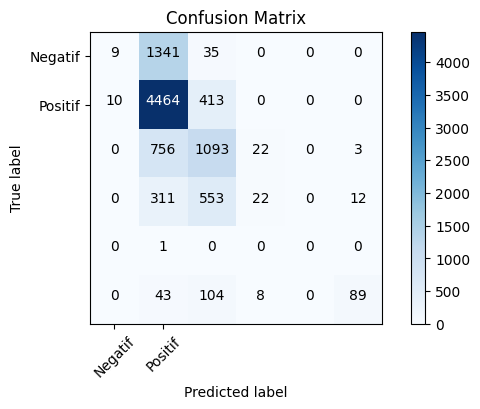

In [ ]:
import itertools
confusion_matrix = cm3

# Definisikan label kelas
class_names = ['Negatif', 'Positif']

# Plot confusion matrix
plt.figure(figsize=(6, 4))
plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Tambahkan label pada sumbu x dan y
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Tampilkan nilai di dalam sel
thresh = confusion_matrix.max() / 2.
for i, j in itertools.product(range(confusion_matrix.shape[0]), range(confusion_matrix.shape[1])):
    plt.text(j, i, format(confusion_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if confusion_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predic))

              precision    recall  f1-score   support

           1       0.47      0.01      0.01      1385
           2       0.65      0.91      0.76      4887
           4       0.50      0.58      0.54      1874
           5       0.42      0.02      0.05       898
           6       0.00      0.00      0.00         1
           7       0.86      0.36      0.51       244

    accuracy                           0.61      9289
   macro avg       0.48      0.32      0.31      9289
weighted avg       0.57      0.61      0.53      9289



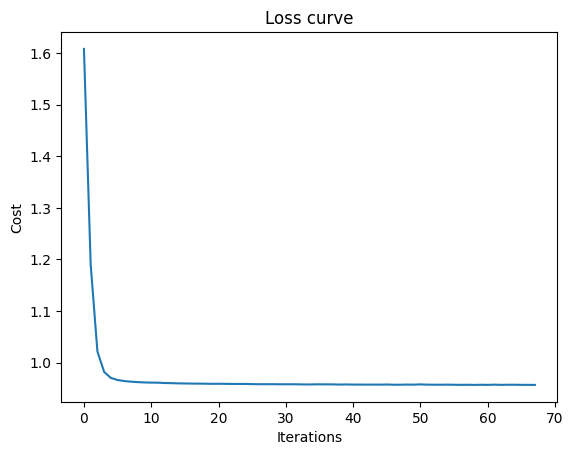

In [ ]:
plt.plot(mlp.loss_curve_)
plt.ylabel('Cost')
plt.xlabel('Iterations')
plt.title('Loss curve')
plt.show()

# **Clasifier w Params**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Bagi data Anda menjadi set pelatihan dan pengujian
X = df.drop('size', axis=1)
Y = df["size"]
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Tentukan parameter hiperparameter jaringan saraf Anda
params = {
    'hidden_layer_sizes': (10, 10, 10),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 0.0001,
    'batch_size': 10,
    'random_state': 42,
    'tol': 1e-4,
    'momentum': 0.9,
    'learning_rate': 'constant',
    'learning_rate_init': 0.01,
    'max_iter': 1000,
    'shuffle': True,
    'n_iter_no_change': 50,
    'verbose': False
}

# Buat MLPClassifier
print("\nMembuat neural network dengan aktivasi relu untuk klasifikasi")
classifier = MLPClassifier(**params)

# Latih classifier pada data training
classifier.fit(X_train, Y_train)

# Lakukan prediksi pada data test
Y_pred_classifier = classifier.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(Y_test, Y_pred_classifier)
precision = precision_score(Y_test, Y_pred_classifier, average='weighted')
recall = recall_score(Y_test, Y_pred_classifier, average='weighted')
f1 = f1_score(Y_test, Y_pred_classifier, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}\n")



Membuat neural network dengan aktivasi relu untuk klasifikasi
Accuracy: 0.9103826901340223
Precision: 0.9112825153064348
Recall: 0.9103826901340223
F1 Score: 0.9019741064238723



In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y_test,Y_pred_classifier)
print(confusion_matrix(Y_test,Y_pred_classifier))

In [ ]:
print(classifier.out_activation_)
print(classifier.n_layers_)
print(classifier.n_outputs_)



softmax
5
6


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'vakidation'], loc='upperleft')
plt.show()

AttributeError: ignored

In [ ]:
history=classifier.fit(X_train, Y_train, epochs = 5, validation_split=.1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'vakidation'], loc='upperleft')
plt.show()

In [ ]:
losses = []
for i in range(params['max_iter']):
    classifier.partial_fit(X_train, Y_train, classes=np.unique(Y_train))
    loss = classifier.loss_
    losses.append(loss)

plt.plot(range(params['max_iter']), losses)
plt.xlabel('Iterasi')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# **Best Param**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp_gs = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(10, 30, 10), (20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)

X = df.drop('size', axis=1)
Y = df["size"]

# Lakukan grid search untuk mencari parameter terbaik
clf.fit(X, Y)

# Cetak parameter terbaik
print("Parameter Terbaik:")
print(clf.best_params_)


KeyboardInterrupt: ignored

In [ ]:
from sklearn.model_selection import cross_val_score

# Tentukan klasifier MLPClassifier dan parameter hiperparameternya
classifier = MLPClassifier(**params)

# Lakukan cross-validation dengan 5-fold
cv_scores = cross_val_score(classifier, X, Y, cv=5, scoring='accuracy')

# Hasil cross-validation
print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy: {:.2f}".format(cv_scores.mean()))


Cross-Validation Scores:
[0.6489585  0.58114    0.63549742 0.63178295 0.57574289]
Mean Accuracy: 0.61


In [ ]:
from sklearn.model_selection import GridSearchCV

# Tentukan daftar parameter yang akan diuji
param_grid = {
    'hidden_layer_sizes': [(10, 2), (10, 5), (15, 2)],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 300, 500]
 }

# Buat model MLPClassifier
classifier = MLPClassifier(activation='relu', solver='adam', random_state=0, batch_size=10)

# Gunakan GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Cetak parameter terbaik
print("Parameter Terbaik:")
print(grid_search.best_params_)

# Cetak akurasi terbaik
best_classifier = grid_search.best_estimator_
Y_pred_best = best_classifier.predict(X_test)
best_accuracy = accuracy_score(Y_test, Y_pred_best)
print("Akurasi Terbaik: ", best_accuracy)
